In [1]:
import pandas as pd

In [2]:
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data' , header=None)

In [3]:
df_wine.describe(include='all')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [4]:
df_wine.columns

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13], dtype='int64')

In [5]:
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler

In [6]:
X, y = df_wine.iloc[:, 1:], df_wine.iloc[:, 0]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [8]:
print ('Total: %s, X_train: %s, X_test: %s, y_train: %s, y_test: %s, ratio: %s' % \
       (len(X), len(X_train), len(X_test), len(y_train), len(y_test), len(X_test)/float(len(X))))

Total: 178, X_train: 124, X_test: 54, y_train: 124, y_test: 54, ratio: 0.303370786517


In [9]:
sc = StandardScaler() 'Standardize features by removing the mean and scaling to unit variance'
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [10]:
import numpy as np

In [11]:
cov_mat = np.cov(X_train_std.T) 'each row of the input matrix has to represent a variable'

In [22]:
eigen_vals, eigen_vectors = np.linalg.eig(cov_mat)

In [24]:
eigen_vals_ratio = [i/sum(eigen_vals) for i in sorted(eigen_vals, reverse=True)]
eigen_vals_ratio

[0.37329647723490672,
 0.18818926106599562,
 0.10896790724757811,
 0.077243894771248739,
 0.064785946018261709,
 0.045920138114781441,
 0.039869355976347075,
 0.025219142607261571,
 0.022581806817679673,
 0.018309244719526899,
 0.01635336265505145,
 0.012842705837492759,
 0.0064207569338682732]

In [25]:
cum_eigen_vals_ratio = np.cumsum(eigen_vals_ratio, axis = 0)
cum_eigen_vals_ratio

array([ 0.37329648,  0.56148574,  0.67045365,  0.74769754,  0.81248349,
        0.85840362,  0.89827298,  0.92349212,  0.94607393,  0.96438317,
        0.98073654,  0.99357924,  1.        ])

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline

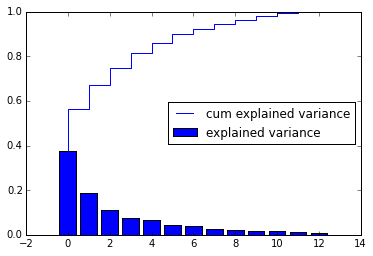

In [36]:
plt.bar(range(len(eigen_vals_ratio)), eigen_vals_ratio, align='center', label = 'explained variance')
plt.step(range(len(cum_eigen_vals_ratio)), cum_eigen_vals_ratio, label='cum explained variance')
plt.legend(loc='best')
plt.show()

In [79]:
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vectors[:, i]) for i in range(len(eigen_vals))]

In [89]:
np.hstack((eigen_pairs[0][1],eigen_pairs[1][1]))

array([ 0.14669811, -0.24224554, -0.02993442, -0.25519002,  0.12079772,
        0.38934455,  0.42326486, -0.30634956,  0.30572219, -0.09869191,
        0.30032535,  0.36821154,  0.29259713,  0.50417079,  0.24216889,
        0.28698484, -0.06468718,  0.22995385,  0.09363991,  0.01088622,
        0.01870216,  0.03040352,  0.54527081, -0.27924322, -0.174365  ,
        0.36315461])

In [95]:
np.hstack((eigen_pairs[0][1][:, np.newaxis], eigen_pairs[1][1][:, np.newaxis]))

array([[ 0.14669811,  0.50417079],
       [-0.24224554,  0.24216889],
       [-0.02993442,  0.28698484],
       [-0.25519002, -0.06468718],
       [ 0.12079772,  0.22995385],
       [ 0.38934455,  0.09363991],
       [ 0.42326486,  0.01088622],
       [-0.30634956,  0.01870216],
       [ 0.30572219,  0.03040352],
       [-0.09869191,  0.54527081],
       [ 0.30032535, -0.27924322],
       [ 0.36821154, -0.174365  ],
       [ 0.29259713,  0.36315461]])

In [92]:
print(np.newaxis)

None
